In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import random

In [3]:
# Tentukan dimensi gambar yang diharapkan oleh model
target_width, target_height = 224, 224

# Inisialisasi list untuk menyimpan gambar dan label train
train_images = []
train_labels = []

# Path ke folder dataset train
train_dataset_path = "C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/train"

# Daftar kelas berdasarkan folder train
classes = os.listdir(train_dataset_path)

# Mengolah data gambar train
for class_name in classes:
    train_class_path = os.path.join(train_dataset_path, class_name)
    for image_name in os.listdir(train_class_path):
        image_path = os.path.join(train_class_path, image_name)
        image = load_img(image_path, target_size=(target_width, target_height))
        image_array = img_to_array(image)
        train_images.append(image_array)
        train_labels.append(class_name)

# Mengubah list menjadi array numpy
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Normalisasi data gambar train
train_images = train_images.astype('float32') / 255.0

# Mengubah label train menjadi format one-hot encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=len(classes))


In [4]:
import cv2
# Tentukan path direktori data test
test_data_dir = 'C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/test'

# Inisialisasi list untuk menyimpan data dan label
x_test = []
y_test = []

# Loop melalui setiap file dalam direktori data test
for filename in os.listdir(test_data_dir):
    if filename.endswith('.jpg'):  # Hanya memproses file dengan ekstensi .jpg
        file_path = os.path.join(test_data_dir, filename)
        image = cv2.imread(file_path)  # Membaca gambar menggunakan OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB (opsional, tergantung kebutuhan)

        # Lakukan praproses gambar jika diperlukan (misalnya, resize, normalisasi, dsb.)

        # Tambahkan gambar ke x_test
        x_test.append(image)

        # Ambil label dari nama file (misalnya, jika nama file adalah "cat.jpg", maka labelnya adalah "cat")
        label = os.path.splitext(filename)[0]
        y_test.append(label)

# Konversi x_test dan y_test ke dalam format array numpy
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = x_test.astype('float32') / 255.0
# Tampilkan jumlah data test
print("Jumlah data test:", len(x_test))
print("Jumlah label test:", len(y_test))


Jumlah data test: 20
Jumlah label test: 20


In [5]:
num_rows, num_columns = train_images.shape, train_images.shape
print("Jumlah baris pada ytrain:", num_rows)
print("Jumlah kolom pada ytrain:", num_columns)

Jumlah baris pada ytrain: (80, 224, 224, 3)
Jumlah kolom pada ytrain: (80, 224, 224, 3)


In [6]:
from tensorflow.keras.optimizers import Adam
# Inisialisasi model
model = Sequential()

#Menambahkan layer Convolutional
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(target_width, target_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer untuk mengubah output menjadi vektor
model.add(Flatten())

# Menambahkan layer Dense (fully connected)
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

# Mengompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [8]:
model.fit(train_images, train_labels, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
2/2 [==============================] - 4s 2s/step - loss: 2.5975 - accuracy: 0.0781 - val_loss: 6.3773 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 3s 1s/step - loss: 2.3623 - accuracy: 0.1250 - val_loss: 2.9977 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 3s 1s/step - loss: 2.2226 - accuracy: 0.1250 - val_loss: 3.2923 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 3s 1s/step - loss: 2.1437 - accuracy: 0.2812 - val_loss: 4.3243 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 3s 1s/step - loss: 1.9936 - accuracy: 0.2812 - val_loss: 4.6836 - val_accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 3s 1s/step - loss: 1.8639 - accuracy: 0.5469 - val_loss: 6.0168 - val_accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - 3s 2s/step - loss: 1.6288 - accuracy: 0.6250 - val_loss: 7.8225 - val_accuracy: 0.0000e+00
Epoch 8/30
2/

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [10]:
# Melakukan evaluasi model pada data test
loss, accuracy = model.evaluate(train_images, train_labels)

# Menampilkan akurasi pada data test
print("Akurasi pada data test: {:.2f}%".format(accuracy * 100))

3/3 [==============================] - 1s 312ms/step - loss: 8.2633 - accuracy: 0.8000
Akurasi pada data test: 80.00%


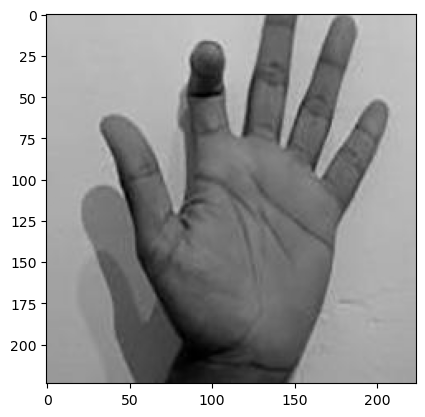

In [11]:
idx = random.randint(0, len(train_images))
plt.imshow(train_images[idx,:])

In [12]:
# # Path ke folder dataset test
# test_dataset_path = "/content/drive/MyDrive/dataset/test"

# # Inisialisasi list untuk menyimpan gambar test
# test_images = []

# # Mengolah data gambar test
# for image_name in os.listdir(test_dataset_path):
#     image_path = os.path.join(test_dataset_path, image_name)
#     image = load_img(image_path, target_size=(target_width, target_height))
#     image_array = img_to_array(image)
#     test_images.append(image_array)

# # Mengubah list menjadi array numpy
# test_images = np.array(test_images)
# # Normalisasi data gambar test
# test_images = test_images.astype('float32') / 255.0
# # idx2 = random.randint(0, len(test_images))
# # plt.imshow(test_images[idx2, :])
# # plt.show()
# # input_image = np.expand_dims(test_images[idx2], axis=0)
# # Melakukan prediksi pada data test
# predictions = model.predict(test_images)

# # Mendapatkan label hasil prediksi
# predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# # for j in range(len(predicted_labels)):
# #     #if predictions[0][j] >= 0:
# #       print('GAMBAR TELAPAK TANGAN :', predicted_labels[j])


# # Menampilkan hasil prediksi
# for i in range(len(predicted_labels)):
#     print(f"Gambar {i+1} {image_name}: {predicted_labels[i]}")


In [13]:
# import glob
# # Path ke folder dataset test
# test_files = glob.glob('/content/drive/MyDrive/dataset/test/*.jpg')

# # Inisialisasi list untuk menyimpan gambar test
# test_images = []

# image_names = [os.path(file) for file in test_files]
# # Mengolah data gambar test
# # for image_name in os.listdir(test_dataset_path):
# #     image_path = os.path.join(test_dataset_path, image_name)
# for test_file in image_name:
#   image = load_img(test_file, target_size=(target_width, target_height))
#   image_array = img_to_array(image)
#   test_images.append(image_array)

# # Mengubah list menjadi array numpy
# test_images = np.array(test_images)
# # Normalisasi data gambar test
# test_images = test_images.astype('float32') / 255.0
# # idx2 = random.randint(0, len(test_images))
# # plt.imshow(test_images[idx2, :])
# # plt.show()
# # input_image = np.expand_dims(test_images[idx2], axis=0)
# # Melakukan prediksi pada data test
# predictions = model.predict(test_images)

# # Mendapatkan label hasil prediksi
# predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# # for j in range(len(predicted_labels)):
# #     #if predictions[0][j] >= 0:
# #       print('GAMBAR TELAPAK TANGAN :', predicted_labels[j])


# # Menampilkan hasil prediksi
# for i in range(len(predicted_labels)):
#   #print(image, predicted_labels[i])
#     print(f" gambar {test_file}: {predicted_labels[i]}")


In [14]:
import glob
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Get the file paths of test images using glob
test_image_paths = glob.glob('C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/test/*.jpg')

# Initialize lists to store test data and predictions
test_images = []


# Iterate over the test image paths
for image_path in test_image_paths:
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Adjust the size as per your model requirements
    image = image / 255.0  # Normalize the image
    test_images.append(image)

# Convert the list of images to a NumPy array
test_images = np.array(test_images)
predictions = model.predict(test_images)

# Mendapatkan label hasil prediksi
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Process the predictions
# for i, prediction in enumerate(predictions):
for i in range(len(predicted_labels)):
    # class_index = np.argmax(prediction)
    # class_name = classes[class_index]
    # confidence = prediction[class_index]
    print(f"Image: {test_image_paths[i]}, Predicted Class: {predicted_labels[i]}")


1/1 [==============================] - 0s 375ms/step
Image: C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/test\2023-06-08_165712-832192.jpg, Predicted Class: syifa
Image: C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/test\2023-06-08_165712-834185.jpg, Predicted Class: indah
Image: C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/test\2023-06-08_165712-837188.jpg, Predicted Class: ilyas
Image: C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/test\2023-06-08_165712-840187.jpg, Predicted Class: mitha
Image: C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/test\2023-06-08_165712-842187.jpg, Predicted Class: syifa
Image: C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/test\2023-06-08_165712-847194.jpg, Predicted Class: ilyas
Image: C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/test\2023-06-08_165712-848195.jpg, Predicted Class: ilyas
Image: C:/Users/ASUS/Downloads/TUGASKU/jupyter/lomba/dataset/test\2023-06-08_165712-850192.jpg, Predicted Class: f

In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical


# Melakukan prediksi menggunakan model pada data test
y_pred = model.predict(test_images)

# Mengambil indeks label dengan probabilitas tertinggi sebagai prediksi
y_pred = np.argmax(y_pred, axis=1)

# Mengubah label kategorikal ke dalam bentuk one-hot encoding
y_true = to_categorical(predictions)

# Mengambil indeks label dengan nilai 1 sebagai label sebenarnya
y_true = np.argmax(y_true, axis=1)

# Menghitung akurasi
accuracy = np.mean(y_pred == y_true)

# Menampilkan akurasi
print("Akurasi: {:.2f}%".format(accuracy * 100))


1/1 [==============================] - 0s 224ms/step
Akurasi: 0.00%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5000\2458103590.py:19: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.mean(y_pred == y_true)
